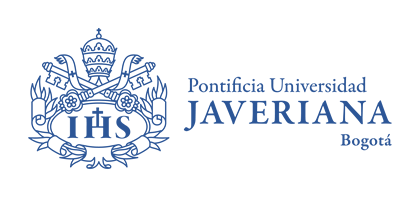

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [24]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [25]:
df_results = pd.read_csv("data.res", sep=',', header=None, names=['n','bubble','insertion','quick'])

In [26]:
df_results.head()

,n,bubble,insertion,quick
0,1,1400,700,600
1,101,738000,202600,138200
2,201,2769400,696500,255400
3,301,6802100,1669100,406200
4,401,13174000,3422300,666000


 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

<Axes: xlabel='n'>

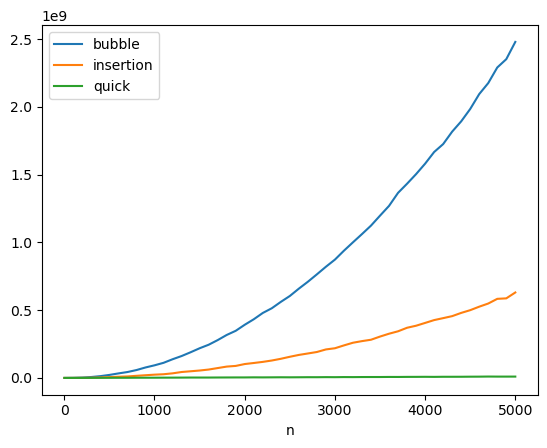

In [27]:
df_results.plot(y=['bubble','insertion','quick'],x='n')

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [28]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [29]:
mod = smf.ols(formula='bubble ~ np.power(n,2)', data=df_results)

In [30]:
res = mod.fit()

In [31]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bubble   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.752e+05
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.39e-99
Time:                        15:36:08   Log-Likelihood:                -880.63
No. Observations:                  51   AIC:                             1765.
Df Residuals:                      49   BIC:                             1769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.609e+06   1.63e+06     -3.

Los parámetros nos indican la relación encontrada entre las variables

In [32]:
res.params


Intercept        -5.609232e+06
np.power(n, 2)    9.876921e+01
dtype: float64

El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

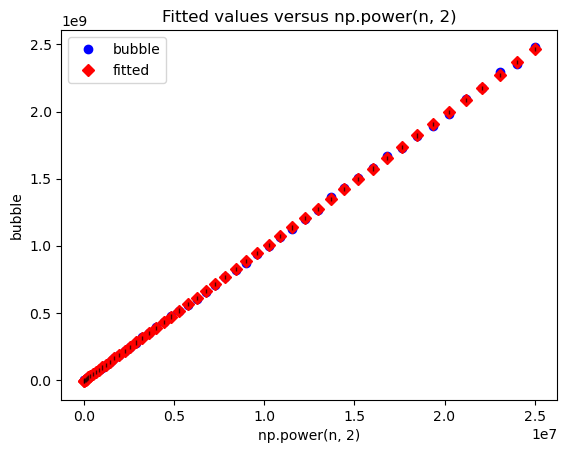

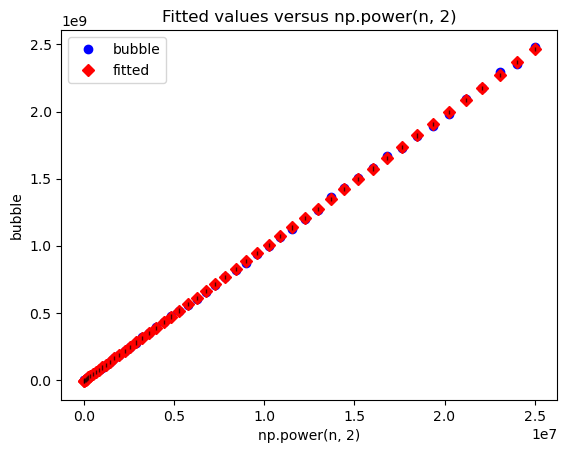

In [33]:
sm.graphics.plot_fit(res,"np.power(n, 2)")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [34]:
mod = smf.ols(formula='quick ~ n:np.log2(n)', data=df_results)

In [35]:
res = mod.fit()

In [36]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  quick   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           6.41e-60
Time:                        15:36:09   Log-Likelihood:                -693.77
No. Observations:                  51   AIC:                             1392.
Df Residuals:                      49   BIC:                             1395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.028e+05   5.21e+04      1.974   

In [37]:
res.params

Intercept       102810.609738
n:np.log2(n)       163.622177
dtype: float64

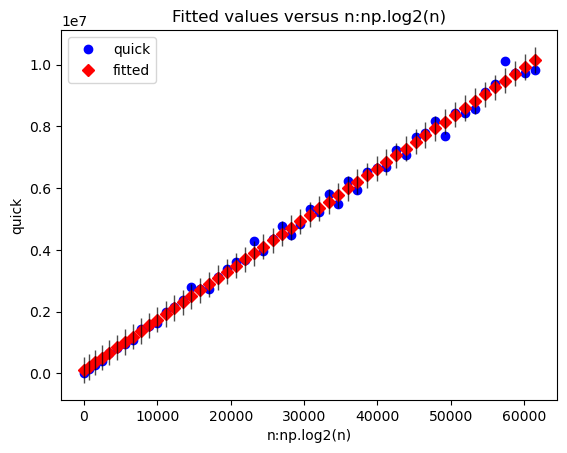

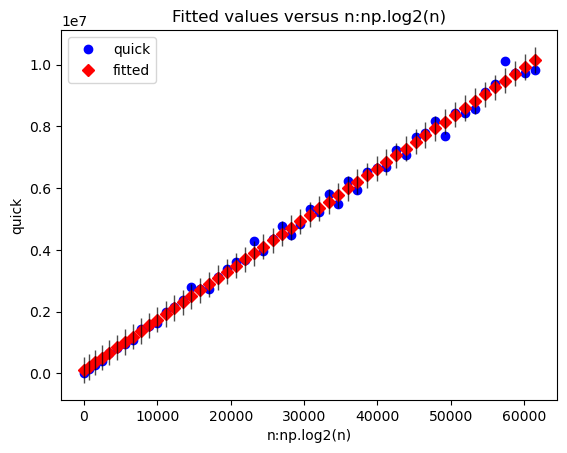

In [38]:
sm.graphics.plot_fit(res, "n:np.log2(n)")

In [39]:
mod = smf.ols(formula='insertion ~ np.power(n,2)', data=df_results)

In [40]:
res = mod.fit()

In [41]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              insertion   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.193e+05
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.21e-84
Time:                        15:36:10   Log-Likelihood:                -845.81
No. Observations:                  51   AIC:                             1696.
Df Residuals:                      49   BIC:                             1699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.522e+05   8.22e+05     -0.

In [42]:
res.params

Intercept        -652237.556155
np.power(n, 2)        25.000526
dtype: float64

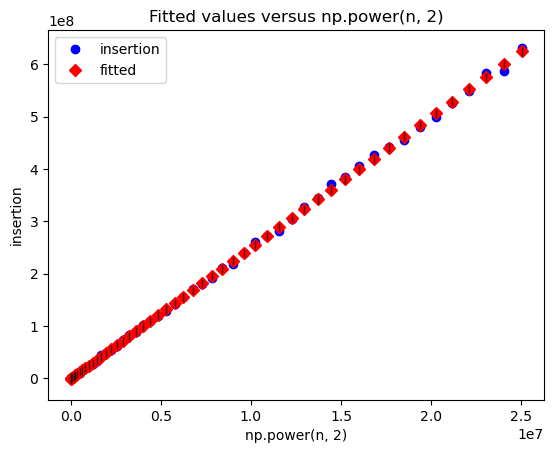

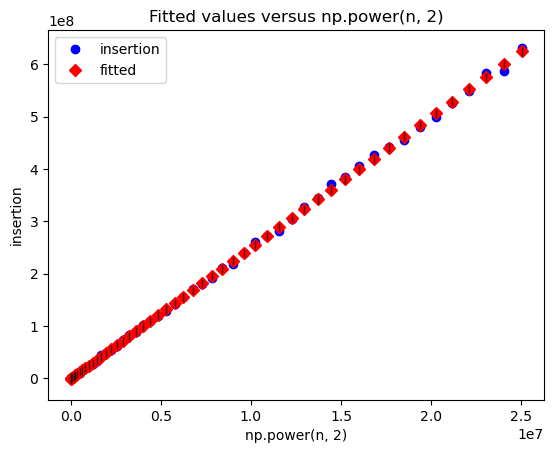

In [43]:
sm.graphics.plot_fit(res, "np.power(n, 2)")